### Pt. 3 
##### Neural Network pipeline for Big G's automotive
 * This notebook is specifically for a logistic regression.

In [12]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.calibration import CalibrationDisplay
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    classification_report, accuracy_score, confusion_matrix, 
    f1_score, fbeta_score, 
    matthews_corrcoef, brier_score_loss
)
from sklearn.calibration import CalibrationDisplay

from imblearn.over_sampling import RandomOverSampler

In [2]:
#read df in
#For some reason columns (7,12,15,16,18,19,20,21,22,23,25,27,28) have mixed types. Same warning as in pt. 2. to see warning, delete low_memory=False
big_g_df=pd.read_csv('../data/big_g_pipeline_ready.csv', low_memory=False)

In [3]:
big_g_df=big_g_df.drop(columns=['Unnamed: 0',
                      ])

In [4]:
pd.set_option('display.max_columns', None)

In [5]:
big_g_df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 507342 entries, 0 to 507341
Data columns (total 245 columns):
 #    Column                     Dtype  
---   ------                     -----  
 0    EventTimeStamp             object 
 1    RecordID                   int64  
 2    spn                        int64  
 3    fmi                        int64  
 4    active                     bool   
 5    activeTransitionCount      int64  
 6    EquipmentID                int64  
 7    Latitude                   float64
 8    Longitude                  float64
 9    LocationTimeStamp          object 
 10   time_of_day                object 
 11   rolling_count_5246         float64
 12   rolling_count_1569         float64
 13   BarometricPressure         object 
 14   CruiseControlActive        bool   
 15   CruiseControlSetSpeed      float64
 16   DistanceLtd                object 
 17   EngineCoolantTemperature   object 
 18   EngineLoad                 int64  
 19   EngineOilPressure    

In [6]:
print(list(big_g_df.columns))

['EventTimeStamp', 'RecordID', 'spn', 'fmi', 'active', 'activeTransitionCount', 'EquipmentID', 'Latitude', 'Longitude', 'LocationTimeStamp', 'time_of_day', 'rolling_count_5246', 'rolling_count_1569', 'BarometricPressure', 'CruiseControlActive', 'CruiseControlSetSpeed', 'DistanceLtd', 'EngineCoolantTemperature', 'EngineLoad', 'EngineOilPressure', 'EngineOilTemperature', 'EngineRpm', 'EngineTimeLtd', 'FuelLtd', 'FuelRate', 'IgnStatus', 'IntakeManifoldTemperature', 'LampStatus', 'Speed', 'TurboBoostPressure', 'geometry', 'distance', 'spn_combined', '1761_1', '1761_10', '1761_11', '1761_17', '1761_18', '1761_19', '1761_3', '1761_4', '1761_9', '3031_18', '3031_2', '3031_3', '3031_4', '3031_9', '3216_10', '3216_11', '3216_16', '3216_2', '3216_20', '3216_21', '3216_3', '3216_4', '3216_9', '3217_2', '3218_2', '3222_5', '3226_10', '3226_11', '3226_16', '3226_2', '3226_20', '3226_21', '3226_4', '3226_9', '3227_10', '3227_21', '3228_2', '3242_0', '3242_15', '3242_16', '3242_3', '3242_4', '3246_0'

In [24]:
features = [ 'rolling_count_5246', '1761_1', '1761_10', '1761_11', '1761_17', '1761_18', '1761_19', '1761_3', '1761_4', '1761_9', '3031_18', '3031_2', '3031_3', 
            '3031_4', '3031_9', '3216_10', '3216_11', '3216_16', '3216_2', '3216_20', '3216_21', '3216_3', '3216_4', '3216_9', '3217_2', 
            '3218_2', '3222_5', '3226_10', '3226_11', '3226_16', '3226_2', '3226_20', '3226_21', '3226_4', '3226_9', '3227_10', '3227_21', 
            '3228_2', '3242_0', '3242_15', '3242_16', '3242_3', '3242_4', '3246_0', '3246_15', '3246_16', '3246_2', '3246_3', '3246_4', 
            '3251_0', '3251_10', '3251_15', '3251_16', '3251_2', '3251_3', '3251_4', '3360_11', '3360_12', '3360_19', '3360_2', '3360_9', 
            '3361_12', '3361_2', '3361_3', '3361_4', '3361_5', '3362_31', '3362_7', '3363_16', '3363_3', '3363_4', '3363_5', '3363_7', 
            '3364_10', '3364_11', '3364_18', '3364_3', '3364_9', '3480_17', '3480_2', '3480_3', '3480_4', '3482_2', '3482_3', '3482_7', 
            '3490_3', '3490_4', '3490_7', '3515_10', '3521_18', '3556_18', '3556_2', '3556_5', '3610_2', '3610_3', '3610_4', '3703_31', 
            '3720_15', '3936_14', '3936_15', '3936_16', '3936_7', '4094_18', '4094_31', '4096_31', '4331_16', '4331_18', '4334_16', 
            '4334_18', '4334_2', '4334_3', '4334_4', '4339_7', '4340_3', '4340_4', '4340_5', '4342_3', '4342_4', '4342_5', '4344_3', '4344_4',
            '4344_5', '4346_5', '4360_0', '4360_10', '4360_16', '4360_3', '4360_4', '4363_0', '4363_10', '4363_16', '4363_2', '4363_3', '4363_4',
            '4364_18', '4364_31', '4375_2', '4375_4', '4376_3', '4376_4', '4376_5', '4376_7', '4765_16', '4765_2', '4765_3', '4765_4', '4766_15',
            '4766_3', '4792_14', '4794_31', '4795_31', '4796_31', '5024_10', '5031_10', '520953_4', '521032_14', '5246_16', '5298_17',
            '5298_18', '5319_31', '5392_31', '5394_3', '5394_4', '5394_5', '5394_7', '5397_31', '5491_3', '5491_4', '5491_5', '5491_7', '5569_2',
            '5742_11', '5742_12', '5742_16', '5742_3', '5742_4', '5742_9', '5743_11', '5743_12', '5743_3', '5743_4', '5743_9', '5745_18', '5745_3',
            '5745_4', '5746_4', '5835_21', '5835_3', '5835_4', '5835_9', '5848_12', '5848_13', '5848_19', '5848_4', '5848_9', '5851_18', '5851_2',
            '5853_10', '5862_0', '5862_16', '5862_2', '5862_3', '5862_4', '6773_16', '6780_3', '6802_31', '7321_4', '7323_4', '7854_2', '7854_3',
            '7854_4']

X = big_g_df[features]
y = big_g_df['5246_0']

# Encode the target variable
le = LabelEncoder().fit(y)
y = le.transform(y)

# Perform a train/test split first, a la MH's with a y_val incorporated...
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, random_state = 321, train_size = 0.8)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, stratify = y_train, random_state = 321, train_size = 0.6/0.8)

# Scale predictors
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

len(features)

211

In [25]:
lr = LogisticRegression()

In [26]:
logreg = lr.fit(X_train, y_train)

In [27]:
y_pred = lr.predict(X_test)
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(f'MCC: {matthews_corrcoef(y_test, y_pred)}')
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.9995269491174644
MCC: 0.0
[[101421      0]
 [    48      0]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    101421
           1       0.00      0.00      0.00        48

    accuracy                           1.00    101469
   macro avg       0.50      0.50      0.50    101469
weighted avg       1.00      1.00      1.00    101469



C:\Users\micha\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\micha\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\micha\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [21]:
y_val_pred_proba = lr.predict_proba(X_val)[:,1]

C:\Users\micha\anaconda3\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [35]:
candidate_thresholds = np.arange(start = .1, stop = 100, step = 0.01)
thresholds = pd.DataFrame({'threshold': candidate_thresholds})
thresholds['f1'] = thresholds['threshold'].apply(lambda x: f1_score(y_val, y_val_pred_proba > x))
thresholds.sort_values('f1', ascending = False).head()

,threshold,f1
0,0.10,0.0
6663,66.73,0.0
6656,66.66,0.0
6657,66.67,0.0
6658,66.68,0.0


Changing thresholds doesn't seem very promising...

In [28]:
lr_balanced = LogisticRegression(class_weight='balanced')
lr_balanced.fit(X_train, y_train)

LogisticRegression(class_weight='balanced')

In [29]:
y_pred = lr_balanced.predict(X_test)
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(f'MCC: {matthews_corrcoef(y_test, y_pred)}')
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.0408302042988499
MCC: 0.004461307128194118
[[ 4095 97326]
 [    0    48]]
              precision    recall  f1-score   support

           0       1.00      0.04      0.08    101421
           1       0.00      1.00      0.00        48

    accuracy                           0.04    101469
   macro avg       0.50      0.52      0.04    101469
weighted avg       1.00      0.04      0.08    101469



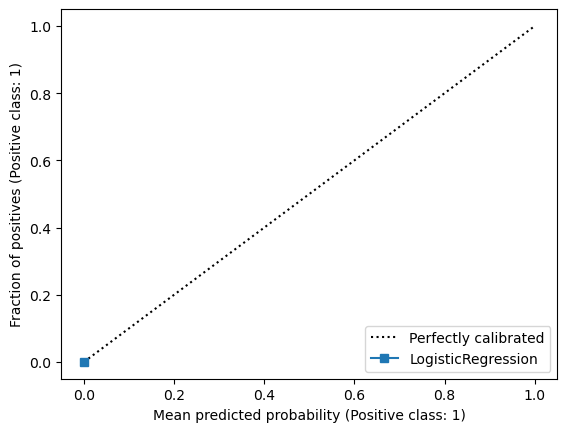

In [30]:
CalibrationDisplay.from_estimator(lr, X_test, y_test);

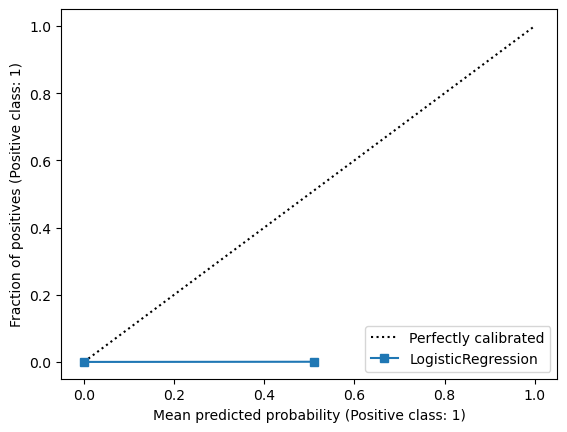

In [31]:
CalibrationDisplay.from_estimator(lr_balanced, X_test, y_test);

In [32]:
oversampler = RandomOverSampler(random_state = 321)
X_resampled, y_resampled = oversampler.fit_resample(X_train, y_train)

In [33]:
y_resampled.value_counts()

AttributeError: 'numpy.ndarray' object has no attribute 'value_counts'

In [34]:
lr_oversample = LogisticRegression().fit(X_resampled, y_resampled)

y_pred = lr_oversample.predict(X_test)
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(f'MCC: {matthews_corrcoef(y_test, y_pred)}')
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.0408302042988499
MCC: 0.004461307128194118
[[ 4095 97326]
 [    0    48]]
              precision    recall  f1-score   support

           0       1.00      0.04      0.08    101421
           1       0.00      1.00      0.00        48

    accuracy                           0.04    101469
   macro avg       0.50      0.52      0.04    101469
weighted avg       1.00      0.04      0.08    101469

